In [3]:
from PIL import Image
from io import BytesIO

import requests
import time

from colorthief import ColorThief
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import pandas as pd

import caffeine

In [2]:
library = pd.read_csv('library.csv', index_col=0)

library.head(5)

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre
0,The Stones of Venice,1851.0,['John Ruskin'],archive.org/services/img/stonesofvenice01ruskiala,2.0,Architecture,Arts
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],archive.org/services/img/architetturamedi01arat,7.0,Architecture,Arts
2,The Alhambra,1800.0,['Washington Irving'],archive.org/services/img/alhambra13irvi,5.0,Architecture,Arts
3,Coriolanus,1734.0,['William Shakespeare'],archive.org/services/img/templeshakespear03shak,14.0,Architecture,Arts
4,A Child's History of England,1800.0,['Charles Dickens'],archive.org/services/img/childshistoryofe00dic...,2.0,Architecture,Arts


In [51]:
library.genre.value_counts()

Fiction                  13300
Arts                     11960
Textbooks                 9100
Biography                 8000
Books by Language         7000
Health & Wellness         6000
Animals                   5000
Science & Mathematics     5000
Children's                5000
History                   5000
Business & Finance        4180
Social Sciences           4000
Places                    3260
Name: genre, dtype: int64

In [53]:
library.loc[library.genre=="Children's"]

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre
0,Mother Goose in prose,1897.0,"['L. Frank Baum', 'Dainy d. Angeles', 'Maxfiel...",archive.org/services/img/mothergooseprose00baum,1.0,Kids Books,Children's
1,Abridgment of Murray's English Grammar,1800.0,['Lindley Murray'],archive.org/services/img/anabridgementlm00murr...,1.0,Kids Books,Children's
2,A Child's History of England,1800.0,['Charles Dickens'],archive.org/services/img/childshistoryofe00dic...,2.0,Kids Books,Children's
3,A Wonder Book for Girls and Boys,1851.0,['Nathaniel Hawthorne'],archive.org/services/img/wonderbook00hawtarch,4.0,Kids Books,Children's
4,The Enchanted Island of Yew,1903.0,['L. Frank Baum'],covers.openlibrary.org/b/olid/OL9856924M-M.jpg,1.0,Kids Books,Children's
...,...,...,...,...,...,...,...
995,The Hobbit,1937.0,['J.R.R. Tolkien'],archive.org/services/img/derkleinehobbit0000tolk,21.0,Picture Books,Children's
996,Alice's Adventures in Wonderland,1865.0,['Lewis Carroll'],archive.org/services/img/alicesadventures00car...,54.0,Picture Books,Children's
997,Alice's Adventures in Wonderland / Through the...,1889.0,['Lewis Carroll'],archive.org/services/img/alicesadventures00carr,11.0,Picture Books,Children's
998,Hamlet,1603.0,['William Shakespeare'],archive.org/services/img/tragedyofhamletp00shak_4,43.0,Picture Books,Children's


All of these cover_img_urls are missing "http://" - don't forget to add!

In [11]:
test_url = 'http://archive.org/services/img/stonesofvenice01ruskiala'

In [13]:
response = requests.get(test_url)
print(response.status_code)

200


In [14]:
with open('test_image.jpg', 'wb') as f:
    f.write(response.content)

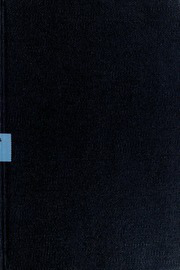

In [15]:
Image.open('test_image.jpg')

In [2]:
test_url2 = 'http://archive.org/services/img/architetturamedi01arat'

In [17]:
response = requests.get(test_url2)
print(response.status_code)

200


In [18]:
with open('test_image2.jpg', 'wb') as f:
    f.write(response.content)

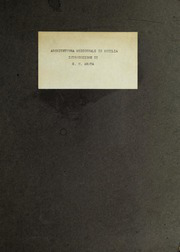

In [19]:
Image.open('test_image2.jpg')

This is working, but now I need to consider the overall flow of how I do this.

I don't actually want to save thousands of images to file.

[This StackOverflow post](https://stackoverflow.com/questions/68007907/return-an-image-taken-from-an-url-without-storing-the-image-file) helped me to devise a much more elegant plan than what I originally had in mind.

#### Helper Functions

We actually only need the "get_cover_color" function two cells down, but the "get_cover" function will allow us to check that our dominant color function is working as expected on a few random titles.

Display the image located at URL:

In [55]:
def get_cover(URL):
    '''Takes in a string (URL), and displays the picture at that URL as a JPEG using Pillow. Assumes that the
    "http://" header is missing from the beginning of the string and adds it.'''
    # fix URL by adding http://
    URL = 'http://' + URL
    
    # make GET request to specified URL
    response = requests.get(URL)
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # now you can "open" the file-like object and treat it like an image
    return Image.open(file_like_object)

Display the dominant color of the image located at URL:

In [57]:
def get_cover_color(URL):
    '''Takes in a string (URL), and displays the dominant color in the image at that URL using ColorThief. Assumes
    that the "http://" header is missing from the beginning of the string and adds it.'''
    # fix URL by adding http://
    URL = 'http://' + URL
    
    # make GET request to specified URL
    response = requests.get(URL)
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # get a color thief object for the image, extract the dominant color & normalize its RGB values to percentages
    palette = ColorThief(file_like_object)
    dominant_color = palette.get_color(quality=1) # RGB tuple
    normalized_color = tuple([x/255 for x in dominant_color])
    
    # check that it looks right =)
    fig, ax = plt.subplots(figsize=(2,2))

    ax.add_patch(Rectangle((0, 0), 1, 1, facecolor=normalized_color))

    ax.spines[:].set_visible(False)

    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    ax.set_xticks([])
    ax.set_yticks([]);

Testing the "get_color_cover" function with the beloved children's book "The Hobbit" by J.R.R. Tolkien:

In [54]:
# use the URL as it is stored in the library.csv dataframe, without the http:// prefix
hobbit_url = 'archive.org/services/img/derkleinehobbit0000tolk'

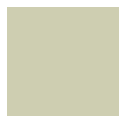

In [58]:
get_cover_color(hobbit_url)

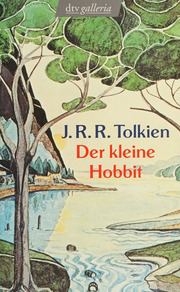

In [59]:
get_cover(hobbit_url)

Test on The Island of Dr. Moreau:

In [60]:
moreau_url = 'archive.org/services/img/islandofdrmoreau00well_1	'

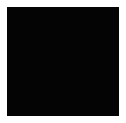

In [61]:
get_cover_color(moreau_url)

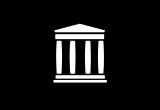

In [62]:
get_cover(moreau_url)

Oh no! I'm glad we did this test. This is clearly a placeholder image for books without a picture of the cover (that looks like the openlibrary.org symbol.)

In [63]:
moreau_url2 = 'archive.org/services/img/islandofdrmoreau00well_1'

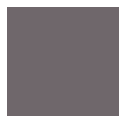

In [64]:
get_cover_color(moreau_url2)

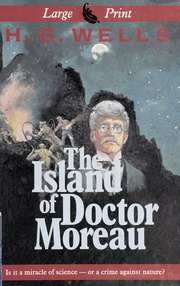

In [65]:
get_cover(moreau_url2)

Interesting. Well, somehow, I picked up a fuzzy symbol at the end of the string in the URL I initially copied for the above book. It caused the image link to break. So I don't know if it is necessary to check for the Open Library symbol when accessing these images, but I might as well, just in case.

Store the bytes returned by a "broken URL" and check that incoming bytes are not equal to it.

In [66]:
broken_url = 'https://archive.org/images/notfound.png'

In [69]:
# make GET request to specified URL
response = requests.get(broken_url)

original_content = response.content
    
# store response in a file named 'null_image.jpg'
with open('null_image.jpg', 'wb') as f:
    f.write(response.content)

In [73]:
with open('null_image.jpg', 'rb') as f:
    stored_content = f.read()

In [74]:
original_content == stored_content

True

Next check: if I use a *different* broken URL, do I get exactly the same bytes from that URL as the broken URL used to save the content?

In [76]:
moreau_url

'archive.org/services/img/islandofdrmoreau00well_1\t'

In [78]:
response = requests.get(f'http://{moreau_url}')

response.content == stored_content

True

Excellent. So we can update our function to check for null images.

In [79]:
def get_cover_color(URL):
    '''Takes in a string (URL), and displays the dominant color in the image at that URL using ColorThief. Assumes
    that the "http://" header is missing from the beginning of the string and adds it.'''
    # fix URL by adding http://
    URL = 'http://' + URL
    
    # make GET request to specified URL
    response = requests.get(URL)
    
    # check for null images
    with open('null_image.jpg', 'rb') as f:
        null_image = f.read()
        
    if response.content == null_image:
        return None
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # get a color thief object for the image, extract the dominant color & normalize its RGB values to percentages
    palette = ColorThief(file_like_object)
    dominant_color = palette.get_color(quality=1) # RGB tuple
    normalized_color = tuple([x/255 for x in dominant_color])
    
    # check that it looks right =)
    fig, ax = plt.subplots(figsize=(2,2))

    ax.add_patch(Rectangle((0, 0), 1, 1, facecolor=normalized_color))

    ax.spines[:].set_visible(False)

    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    ax.set_xticks([])
    ax.set_yticks([]);

In [80]:
get_cover_color(moreau_url)

^ Returns None, as expected.

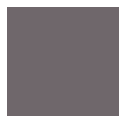

In [81]:
get_cover_color(moreau_url2)

^ Still works.

The final function will return the RGB tuple itself. Then we can apply this method to the cover_img_url column of the library dataframe, and store the results in a new column 'cover_color'. (It's actually only the dominant color in the book cover, but 'dominant_color_cover' is just too long. =))

In [89]:
def get_cover_color(URL):
    '''Takes in a string (URL), and displays the dominant color in the image at that URL using ColorThief. Assumes
    that the "http://" header is missing from the beginning of the string and adds it.'''
    # fix URL by adding http://
    URL = 'https://' + URL
    
    # make GET request to specified URL
    response = requests.get(URL)
    
    # check for null images
    with open('null_image.jpg', 'rb') as f:
        null_image = f.read()
        
    if response.content == null_image:
        return None
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # get a color thief object for the image, extract the dominant color & normalize its RGB values to percentages
    palette = ColorThief(file_like_object)
    return palette.get_color(quality=1)

I'm not sure how long this will take, so let's use caffeine just in case!

In [90]:
%%time

caffeine.on(display=False)

library['cover_color'] = library.cover_img_url.apply(get_cover_color)

library.head()

SSLError: HTTPSConnectionPool(host='images', port=443): Max retries exceeded with url: /icons/avatar_book-sm.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1002)')))

In [108]:
caffeine.off()

Hmm. So it looks like, when you send a request with the python requests package, requests automatically verifies the security certificate (SSL certificate) of the website from which you are requesting a response. If the certificate can't be found (or if, in this case, the certificate isn't "secure enough" by the requests package standards), requests throws an error.

It's possible to override this behavior using verify=False in the GET request, but I'm not sure that I trust the links that I scraped from open library that much. I'm going to try skipping these requests and see if I have enough data that way.

Rewrite function to try the request and return None if there is an error:

In [95]:
def get_cover_color(URL):
    '''Takes in a string (URL), and displays the dominant color in the image at that URL using ColorThief. Assumes
    that the "http://" header is missing from the beginning of the string and adds it.'''
    # fix URL by adding http://
    URL = 'https://' + URL
    
    # make GET request to specified URL
    try:
        response = requests.get(URL)
        time.sleep(1)
    except:
        print('Unsuccessful request')
        return None
    
    # check for null images
    with open('null_image.jpg', 'rb') as f:
        null_image = f.read()
        
    if response.content == null_image:
        print('Null image')
        return None
    
    print('Storing RGB for this title.')
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # get a color thief object for the image, extract the dominant color & normalize its RGB values to percentages
    palette = ColorThief(file_like_object)
    return palette.get_color(quality=1)

In [96]:
%%time

caffeine.on(display=False)

library['cover_color'] = library.cover_img_url.apply(get_cover_color)

library.head()

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Unsuccessful request
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Unsuccessful request
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storin

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Unsuccessful request
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x12ef706d0>

In [109]:
caffeine.off()

In [102]:
library['cover_img_url'].tolist()

['archive.org/services/img/stonesofvenice01ruskiala',
 'archive.org/services/img/architetturamedi01arat',
 'archive.org/services/img/alhambra13irvi',
 'archive.org/services/img/templeshakespear03shak',
 'archive.org/services/img/childshistoryofe00dickiala',
 'archive.org/services/img/vincentvangoghco0000gogh',
 'images/icons/avatar_book-sm.png',
 'archive.org/services/img/paulklee0000klee_r5e8',
 'archive.org/services/img/henrymoorecomple0000moor',
 'archive.org/services/img/davincicodenovel00brow',
 'archive.org/services/img/lesmetamorphoses01ovid',
 'archive.org/services/img/pillarsofearth0000foll_u7j7',
 'archive.org/services/img/leonardodavincid0000clay_m9i6',
 'archive.org/services/img/officialcongress00join',
 'archive.org/services/img/sevenlampsarchit00rusk',
 'covers.openlibrary.org/b/olid/OL6027601M-M.jpg',
 'archive.org/services/img/jeandubuffetretr0000dubu',
 'archive.org/services/img/chicagocityatgla0000unse',
 'archive.org/services/img/montsaintmichel000adam',
 'covers.ope

Scrolling through some of the URLs, I can see why some of them work and others don't.

The URLs that begin with "archive.org/" are working because these are similar to the URLs I used to test my function while I was building it.

The URL that begins with 'images/' should be prepended with "openlibrary.org/", it appears, based on a quick check for one example.

The URLs that begin with "covers.openlibrary.org" should be working. Let's make sure.

In [99]:
get_cover_color('covers.openlibrary.org/b/olid/OL6027601M-M.jpg')

Storing RGB for this title.


(144, 113, 62)

In [104]:
[url for url in library['cover_img_url'].tolist()\
 if (url[:11] != 'archive.org') and (url[:22] != 'covers.openlibrary.org') and (url[:12] != 'images/icons')]

[]

Excellent. The only URLs that we need to treat differently are the URLs that begin with 'images/icons'. These should be prepended with https://openlibary.org/, not just https://.

In [4]:
def get_cover_color(URL):
    '''Takes in a string (URL), and displays the dominant color in the image at that URL using ColorThief.
    
    This function is very specific to the library.csv file contained in this repo. It checks the URL to see if
    it begins with "image/icons", and if so, prepends "https://openlibrary.org/" to the URL to make it a valid link.
    Otherwise, the function prepends "https://" only to the URL to make it a valid link.
    
    This function should not be used on any other data.'''
    
    # fix URL by adding https:// or https://openlibrary.org, as appropriate
    if URL[:12] == 'images/icons':
        URL = 'https://openlibrary.org/' + URL
    else:
        URL = 'https://' + URL
    
    # make GET request to specified URL
    try:
        response = requests.get(URL)
        time.sleep(1)
    except:
        print('Unsuccessful request')
        return None
    
    # check for null images
    with open('null_image.jpg', 'rb') as f:
        null_image = f.read()
        
    if response.content == null_image:
        print('Null image')
        return None
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # get a color thief object for the image, extract the dominant color & normalize its RGB values to percentages
    palette = ColorThief(file_like_object)
    return palette.get_color(quality=1)

In [106]:
%%time

caffeine.on(display=False)

library['cover_color'] = library.cover_img_url.apply(get_cover_color)

library.head()

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Stor

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Stor

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Stor

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RG

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RG

Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RG

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Stor

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Stor

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null imag

Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Storing RGB for this title.
Null image
Storing RGB for this title.
Storing RGB for this title

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1319cba60>

In [110]:
caffeine.off()

In [ ]:
%%time

caffeine.on(display=False)

library['cover_color'] = library.cover_img_url.apply(get_cover_color)

library.head()

To troubleshoot, let's iterate over the list of URLs one by one, and print out some information if an exception is detected.

In [5]:
# troubleshooting

caffeine.on(display=False)

rgb_of_dominant_color = [] # might as well collect data while we troubleshoot

for i, url in enumerate(library.cover_img_url.to_list()):
    try:
        color = get_cover_color(url)
    except Exception as e:
        color = None
        print(f'Issue detected at record {i} with URL:')
        print(url)
        print(e)
        print('\n')
    rgb_of_dominant_color.append(color)
    if i % 1000 == 0:
        print(f'Storing RGB color values for record {i}.')

Storing RGB color values for record 0.
Issue detected at record 315 with URL:
covers.openlibrary.org/b/olid/OL6027601M-M.jpg
cannot identify image file <_io.BytesIO object at 0x124355a80>


Null image
Storing RGB color values for record 1000.
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null imag

Null image
Null image
Null image
Null image
Null image
Storing RGB color values for record 14000.
Null image
Null image
Storing RGB color values for record 15000.
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Storing RGB color values for record 16000.
Issue detected at record 16769 with URL:
covers.openlibrary.org/b/olid/OL10426111M-M.jpg
cannot identify image file <_io.BytesIO object at 0x12438f650>


Storing RGB color values for record 17000.
Issue detected at record 17831 with URL:
covers.openlibrary.org/b/oli

Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Storing RGB color values for record 28000.
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image


Issue detected at record 50902 with URL:
covers.openlibrary.org/b/olid/OL32795626M-M.jpg
cannot identify image file <_io.BytesIO object at 0x123b4a390>


Storing RGB color values for record 51000.
Issue detected at record 51142 with URL:
covers.openlibrary.org/b/olid/OL32795626M-M.jpg
cannot identify image file <_io.BytesIO object at 0x123b4a390>


Issue detected at record 51162 with URL:
covers.openlibrary.org/b/olid/OL32795626M-M.jpg
cannot identify image file <_io.BytesIO object at 0x12438f240>


Issue detected at record 51382 with URL:
covers.openlibrary.org/b/olid/OL32795626M-M.jpg
cannot identify image file <_io.BytesIO object at 0x123b4a390>


Storing RGB color values for record 52000.
Issue detected at record 52222 with URL:
covers.openlibrary.org/b/olid/OL33399467M-M.jpg
cannot identify image file <_io.BytesIO object at 0x123b4a390>


Storing RGB color values for record 53000.
Issue detected at record 53639 with URL:
covers.openlibrary.org/b/olid/OL25275770M-M.jpg
cannot ident

Storing RGB color values for record 68000.
Storing RGB color values for record 69000.
Storing RGB color values for record 70000.
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Storing RGB color values for record 71000.
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Issue detected at record 71590 with URL:
covers.openlibrary.org/b/olid/OL29703825M-M.jpg
cannot identify image file <_io.BytesIO object at 0x12438f650>


Null image
Null image
Null image
Null image
Null image
Null image
Storing RGB color values for record 72000.
Storing RGB color values for record 73000.
Storing RGB color values for record 74

Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image
Null image

Looking at my computer clock, I started running the above cell at around 2:18PM, and I reached 1000 images at about 2:45PM.

If we assume a fairly constant rate of ~2000 images per hour, then to download images for every URL in the library dataframe (which has 86800 records), we need 86800 / 2000 = a little more than 43 hours.

I have caffeine running; I'll be sure that my laptop is plugged in to charge. (ha) And I'll be back to check on this on Sunday or Monday!

In [6]:
caffeine.off()

In [8]:
library['rgb'] = rgb_of_dominant_color

In [12]:
library.head()

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre,rgb
0,The Stones of Venice,1851.0,['John Ruskin'],archive.org/services/img/stonesofvenice01ruskiala,2.0,Architecture,Arts,"(9, 12, 19)"
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],archive.org/services/img/architetturamedi01arat,7.0,Architecture,Arts,"(55, 52, 44)"
2,The Alhambra,1800.0,['Washington Irving'],archive.org/services/img/alhambra13irvi,5.0,Architecture,Arts,"(250, 243, 184)"
3,Coriolanus,1734.0,['William Shakespeare'],archive.org/services/img/templeshakespear03shak,14.0,Architecture,Arts,"(27, 5, 5)"
4,A Child's History of England,1800.0,['Charles Dickens'],archive.org/services/img/childshistoryofe00dic...,2.0,Architecture,Arts,"(66, 42, 27)"


In [10]:
library.rgb.isna().sum()

2564

In [13]:
library.rgb.value_counts()

(228, 228, 228)    6159
(217, 217, 217)     650
(214, 214, 214)     609
(220, 220, 220)     550
(213, 213, 213)     459
                   ... 
(224, 9, 10)          2
(81, 115, 106)        2
(208, 168, 131)       2
(206, 208, 192)       1
(95, 102, 148)        1
Name: rgb, Length: 1181, dtype: int64

In [18]:
library.to_csv('library_w_rgb.csv')

In [19]:
pd.read_csv('library_w_rgb.csv', index_col=0)

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre,rgb
0,The Stones of Venice,1851.0,['John Ruskin'],archive.org/services/img/stonesofvenice01ruskiala,2.0,Architecture,Arts,"(9, 12, 19)"
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],archive.org/services/img/architetturamedi01arat,7.0,Architecture,Arts,"(55, 52, 44)"
2,The Alhambra,1800.0,['Washington Irving'],archive.org/services/img/alhambra13irvi,5.0,Architecture,Arts,"(250, 243, 184)"
3,Coriolanus,1734.0,['William Shakespeare'],archive.org/services/img/templeshakespear03shak,14.0,Architecture,Arts,"(27, 5, 5)"
4,A Child's History of England,1800.0,['Charles Dickens'],archive.org/services/img/childshistoryofe00dic...,2.0,Architecture,Arts,"(66, 42, 27)"
...,...,...,...,...,...,...,...,...
995,Bēkon zuisōshū,1618.0,['Francis Bacon'],archive.org/services/img/baconsadvancemen00bac...,7.0,Japanese,Books by Language,"(30, 15, 14)"
996,Janguru,1905.0,['Upton Sinclair'],archive.org/services/img/jungle0000sinc,16.0,Japanese,Books by Language,"(27, 26, 21)"
997,Le comte de Monte-Cristo,1830.0,"['Alexandre Dumas', 'Hollybooks', 'Luis José S...",archive.org/services/img/countofmontecris00duma_7,10.0,Japanese,Books by Language,"(66, 14, 15)"
998,Max Ernst.,1956.0,"['Max Ernst', 'Werner Spies', 'Fabrice Hergott...",archive.org/services/img/maxernstlifework0000erns,10.0,Japanese,Books by Language,"(39, 35, 31)"
